# Creating a Neural Network in Keras

All good projects start with a Dataset and today, that's the **Fashion-MNIST** dataset. It has 60,000 training samples & 10,000 test samples of grayscale images, each 28x28 pixels. It's available at: https://github.com/zalandoresearch/fashion-mnist

<img src='img/fashionmnist.png'>

Each clothing article is labeled into 10 categories which are...

0. T-Shirt/Top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot

And as a note, the dataset is zeros-indexed so T-Shirt/Top is actually #0. Jupyter Notebook's lists are not zeros-indexed.

If you go to the Github page, the authors of this dataset make a pretty convincing argument why this dataset is better than the far more popular MNIST dataset, which has images containing handwritten numerical digits, and is used around the world to test new networks. In summary, the MNIST dataset has been used so much, it's not really challenging anymore to predict it -- even to the point that normal machine learning models can figure it out.

----
# Pre-Requisites
To do this, I assume you have the following:
* Anaconda 5.0.1 (This is a Python Distribution with several scientific libraries built in)
* Keras
* TensorFlow
* [Optional] Theano

I assume you're running with the latest version of all of Anaconda's libraries. To upgrade Anaconda, you'd run `conda upgrade --all` in your terminal. If you're using Windows... God have mercy on your soul.

To install Keras, TensorFlow, & Theano: Run `conda install keras tensorflow theano` in your terminal.

*NVIDIA GPU Note:* If you have an NVIDIA GPU on your computer, this specific command will not give you a GPU enabled version of TensorFlow. To get a GPU enabled version, you can follow the instructions at https://www.tensorflow.org/install/, but I must admit that I ran into some issues integrating it with Anaconda (correctly). I personally got my GPU enabled copy of TensorFlow from https://github.com/nathanielatom/tensorflow, which Nathaniel already compiled for all the different operating systems.

### What is TensorFlow, Theano, or Microsoft CNTK.
**TensorFlow** is a library with algorithms and concepts to accelerate the types of computation often used in Deep Learning. TensorFlow is Google's solution. It's what we'll use today becuase it's Mac + Linux + Windows compatible and is generally faster on CPUs, which I assume most of us are using today. 

This isn't to discount the other libraries though. **Theano** is a popular library although it has been discontinued. Originally created by the academic community, it is the oldest library by far, and I would argue is a more 'stable' library given how TensorFlow & Microsoft CNTK changes quickly. While it won't recieve any new development as academic knowledge increases, it definately is still honored and well respected as the original computation library.

**Microsoft CNTK** is extremely new and is in a lot of active development. While it's faster & more accurate than TensorFlow, it also has a smaller community, partially due to its recent creation & feelings about Microsoft. While we won't use this today, it's something worth keeping an eye on.

### What is Keras?
**Keras** is a high level Python API that allows for fast prototyping of Convolutional and/or Recurrent Neural Networks. Because it integrates with TensorFlow, Theano, and Microsoft CNTK, it lets us test each of those three computation libraries because different libraries could perform better in different models. 

By default, Keras is ready to go to use TensorFlow. If you wanted to use a different library and/or wanted to use your GPU, you'll need to make a file at `~/.keras/keras.json` (where ~ = your home dir). For example, mine looks like:

In [1]:
{
    "image_data_format": "channels_last",
    "backend": "tensorflow",
    "device": "cuda"
}

{'backend': 'tensorflow',
 'device': 'cuda',
 'image_data_format': 'channels_last'}

----
# Loading up the Data
Keras already has a built in function to load the Fashion MNIST dataset so we'll use that.

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Output Layers
`y_train` and `y_test` are Numpy Arrays with the correct classification value of each image. These are one dimensional arrays with a value for each sample in the dataset. 

In [3]:
# y_train is a Numpy Array which is shaped and looks like this
print(y_train.shape)
print(y_train)

(60000,)
[9 0 0 ..., 3 0 5]


And these are the 'classes' that are valid for each integer type.

In [4]:
# List of valid classes
classes = {0: 'T-Shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}
classes_list = list(classes.values())

We need to reshape this dataset. Right now, this is a one dimensional dataset with an entry for each image. Keras + TensorFlow expects this shape to `(qtyOfSamples, qtyOfClasses, qtyOfClasses)`. Keras comes with a built in Numpy Utilities library which can auto-generate this array so that all values per each sample is 0, except for the single value which correctly distinguishes which class applies to the given sample.

In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Input Layers
`x_train` and `x_test` are Numpy Arrays which have the inputs for the training and testing data set. Each set contains either 60,000 samples or 10,000 samples and each sample is 28x28 pixels. Because each sample is a grayscale image, this is a binary dataset.

In [6]:
# x_train is a Numpy Array which is shaped & looks like this
print(x_train.shape)
print(x_train)

(60000, 28, 28)
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


We need to reshape this dataset. Keras + TensorFlow expects input data to be arranged in a `(qtyOfSamples, width, length, channels)` format -- i.e. a `channels_last` format. `channels` refer to how many 'color' channels are in your model, such as RGB. Because we're working with grayscale images, channels = 1. Thus, the shape of our model should really be (60000, 28, 28, 1) rather than (60000, 28, 28). More information is at https://stackoverflow.com/questions/46145667/shape-of-tensor-for-2d-image-in-keras.

If we were working with `Theano`, it'd expect it to be `channels_first` but let's not worry ourselves about this quite yet.

And if we were working with a `Recurrent Neural Network`, which is time-series based, you'd want to reshape your data into a `(timeSteps,featuresPerStep)` shape.

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


----
# Creating the world's simplest Neural Network
I'm going to architecture my Neural Network across three functions:

1. `fit_model()` will take in the model I create and the training/test input/output datasets. It'll run those datasets through the model to tell me what it predicted.
2. A variety of functions, each one being a different permutation of a Neural Network.
3. `set_params()` which is a function containing a single dictionary of parameters that we'll use to train and build models. This lets us create loops to test different permutations of these functions without duplicating code.

Normally, we'd call these functions from the `main()` function of our code. Given that this is a Jupyter Notebook, we'll just call them straightup from our code blocks.

### fit_model()
Because `fit_model()` will never change regardless of what model we'll create, let's create it now.

In [8]:
def fit_model(model, model_params, x_train, y_train, x_test, y_test):
    """ Fits neural network to the given data 

        Inputs:
        model: The Keras Model created
        model_params: Dictionary of different parameters used in the model
        x_train: Input training data
        y_train: Output training data
        x_test: Input test data
        y_test: Output test data

        Outputs:
        y_pred_rounded: The predicted output test data (compare against y_test)
        metrics: Dictionary stating the 'loss' and 'acc'(uracy) of our model
    """
    # Fits Model
    model.fit(x=x_train, y=y_train, epochs=model_params['epoch'], verbose=1)

    # Predicts Model
    y_pred = model.predict(x_test)
    y_pred_rounded = y_pred.round()

    # Scores Model on Test Data
    metrics = {'acc': 0.0, 'loss': 0.0}
    metrics['loss'], metrics['acc'] = model.evaluate(x_test, y_test)
    print('\nAccuracy {} & Loss {}\n'.format(metrics['acc'], metrics['loss']))

    return y_pred_rounded, metrics

The `model.fit()` function as called above expects an `epoch` parameter to be passed in. This is how many iterations we want to run our model over. We'll populate this value later.

### Model Architecture
Let's first start by creating a standard Neural Network. Recall that in the prior notebook, we discussed that Neural Networks take an input, modified with weights, and ran through multiple neurons with non-linear activation functions.

We'll start by creating a simple sequential neural network with one non-linear layer and then one classification layer at the very end. Generally speaking, I won't hardcode any parameters in this model, choosing to pass them in via a dictionary instead.

In [9]:
def basic_neural(model_params):
    """ Creates a basic Neural Network """
    from keras.layers import BatchNormalization, Dense, Flatten, InputLayer
    from keras.models import Sequential

    # Creates a Sequential Model
    model = Sequential()

    # Prepares the model to accept an input with a 60000x1x28x28 shape.
    model.add(InputLayer(input_shape=(28, 28, 1)))

    # Sets Batch Normalization to normalize inputs per epoch
    model.add(BatchNormalization())
    
    # Runs through a Dense Layer & Activation Function
    # The first argument is mandatory: It defines the dimensionality of the output space
    # The second (optional) argument sets an Activation Function
    model.add(Dense(model_params['dense_1'], activation=model_params['activate_1']))

    # Flattens the model to one dimension
    model.add(Flatten())

    # Runs through a Dense Layer for Classification Purposes
    model.add(Dense(10, activation='softmax'))

    # Compiles the Model
    model.compile(loss=model_params['loss'],
                  optimizer=model_params['optimizer'],
                  metrics=['accuracy'])

    print(model.summary())  # Returns layers created & its dimensions to screen
    return model

### Parameters
The above model requires to inputs, namely the dimensionality of the output space & the activation function. In addition, `fit_model()` expects the number of epochs. Let's set this dictionary now.

In [12]:
def set_params():
    model_params = {}

    # Parameters for a 1 Layer Model
    model_params['dense_1'] = 28
    model_params['activate_1'] = 'relu'

    # Parameters to Compile Model
    model_params['loss'] = 'categorical_crossentropy'
    model_params['optimizer'] = 'adam'
    
    # Parameters to Fit Model
    model_params['epoch'] = 3
    return model_params

### Running & Fitting the Model
And let's call our code now.

In [13]:
model_params = set_params()
model = basic_neural(model_params)
y_pred, metrics = fit_model(model, model_params, x_train, y_train, x_test, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 28)        56        
_________________________________________________________________
flatten_2 (Flatten)          (None, 21952)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                219530    
Total params: 219,590
Trainable params: 219,588
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/3
60000/60000 [==============================] - 12s - loss: 0.4753 - acc: 0.8327    
Epoch 2/3
60000/60000 [==============

### Visualizing the Results
We can create a Confusion Plot to show how our model actually performed. This function will create one and it will not change as our models change.

In [15]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Required in Jupyter Notebook to show plots in line
%matplotlib inline

def conf_matrix(y_test, y_test_predict, classes, title='Confusion Matrix', out=None):
    """ Creates a Confusion Matrix comparing the output test data vs. predicted
        output test data. 

        Inputs:
        y_test: Actual output test data
        y_test_predict: Predicted output test data
        classes: List of valid classes
        title: Title of the plot [Default = 'Confusion Matrix']
        out: Path to save the plot to [Default = None => Only show it]
    """
    # Converts both output arrays into just one column based on the class
    y_test_predict_class = y_test_predict.argmax(1)
    y_test_class = y_test.argmax(1)

    # Creates confusion matrix
    cm_data = confusion_matrix(y_test_class, y_test_predict_class)
    np.set_printoptions(precision=2)

    # Plots Confusion Matrix
    plt.figure()
    plt.imshow(cm_data, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.xlabel('Predicted Label')
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')

    # Plots data on chart
    thresh = cm_data.max() / 2.
    for i, j in itertools.product(range(cm_data.shape[0]), range(cm_data.shape[1])):
        plt.text(j, i, format(cm_data[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_data[i, j] > thresh else "black")

    plt.tight_layout()

    # Saves or Shows Plot
    if out:
        plt.savefig(out)
    else:
        plt.show()

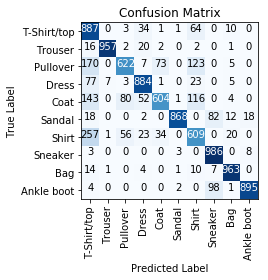

In [16]:
conf_matrix(y_test, y_pred, classes_list, title='Confusion Matrix')

### How did we do?
The producers of this data set tested several Machine Learning models against this dataset to see how they perform. Here are their results:

<img src='img/MachineLearning.jpg'>

In 35 seconds, we got an accuracy of 84.3%. While our model doesn't perform as well as most of the Machine Learning models, it also took a fraction of the time which isn't too bad considering it's the world's simplest Neural Network.

### How many filters is enough?
When we used the first dense layer, we just said 28 filters is enough for the first dense layer... but is it? Let's try different permutations.

Testing dense_1 = 14
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_50 (Dense)             (None, 28, 28, 14)        28        
_________________________________________________________________
flatten_18 (Flatten)         (None, 10976)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                109770    
Total params: 109,802
Trainable params: 109,800
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/3
60000/60000 [==============================] - 6s - loss: 0.4749 - acc: 0.8310     
Epoch 2/3
60000/

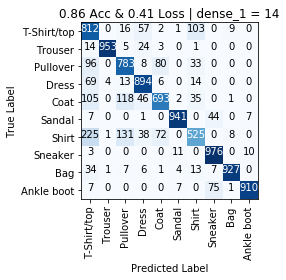

Testing dense_1 = 28
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_52 (Dense)             (None, 28, 28, 28)        56        
_________________________________________________________________
flatten_19 (Flatten)         (None, 21952)             0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                219530    
Total params: 219,590
Trainable params: 219,588
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/3
60000/60000 [==============================] - 11s - loss: 0.4716 - acc: 0.8335    
Epoch 2/3
60000/

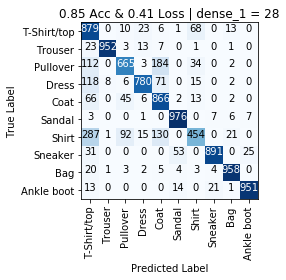

Testing dense_1 = 56
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_54 (Dense)             (None, 28, 28, 56)        112       
_________________________________________________________________
flatten_20 (Flatten)         (None, 43904)             0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                439050    
Total params: 439,166
Trainable params: 439,164
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/3
60000/60000 [==============================] - 27s - loss: 0.4735 - acc: 0.8321    
Epoch 2/3
60000/

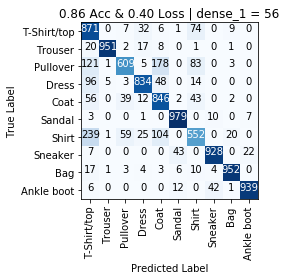

Testing dense_1 = 112
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_56 (Dense)             (None, 28, 28, 112)       224       
_________________________________________________________________
flatten_21 (Flatten)         (None, 87808)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                878090    
Total params: 878,318
Trainable params: 878,316
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/3
60000/60000 [==============================] - 53s - loss: 0.4779 - acc: 0.8318    
Epoch 2/3
60000

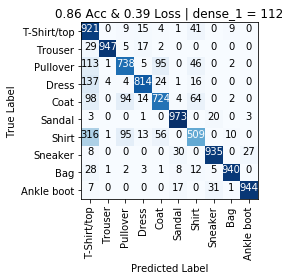

In [31]:
model_params = set_params()

permutation_setting = 'dense_1'
permutation_values = [14, 28, 56]

# Loops between the different permutations
for value in permutation_values:
    model_params[permutation_setting] = value
    print('Testing {} = {}'.format(permutation_setting, value))
    model = basic_neural(model_params)
    y_pred, metrics = fit_model(model, model_params, x_train, y_train, x_test, y_test)

    # Creates Confusion Matrix
    title = '{:4.2f} Acc & {:4.2f} Loss | {} = {}'.format(metrics['acc'], metrics['loss'], permutation_setting, value)
    conf_matrix(y_test, y_pred, classes_list, title=title)

----
# Creating the world's second simplest Neural Network
Let's now extend our network to have two layers so that we can test out the Dropout Layer.

In [21]:
def set_params():
    model_params = {}

    # Parameters for a 1 Layer Model
    model_params['dense_1'] = 28
    model_params['activate_1'] = 'relu'

    # Parameters for a 2 Layer Model
    model_params['dense_2'] = model_params['dense_1'] * 2
    model_params['dropout'] = 0
    
    # Parameters to Compile Model
    model_params['loss'] = 'categorical_crossentropy'
    model_params['optimizer'] = 'adam'
    
    # Parameters to Fit Model
    model_params['epoch'] = 3
    return model_params

In [27]:
def two_neural(model_params):
    """ Creates a basic Neural Network """
    from keras.layers import BatchNormalization, Dense, Dropout, Flatten, InputLayer
    from keras.models import Sequential

    # Creates a Sequential Model
    model = Sequential()

    # Prepares the model to accept an input with a 60000x1x28x28 shape.
    model.add(InputLayer(input_shape=(28, 28, 1)))

    # Sets Batch Normalization to normalize inputs per epoch
    model.add(BatchNormalization())
    
    # Runs through a Dense Layer & Activation Function
    # The first argument is mandatory: It defines the dimensionality of the output space
    # The second (optional) argument sets an Activation Function
    model.add(Dense(model_params['dense_1'], activation=model_params['activate_1']))

    # Dropout Layer to drop 10% of the Neurons
    model.add(Dropout(0.10))
    
    # Second Dense Layer
    model.add(Dense(model_params['dense_2'], activation=model_params['activate_1']))
    
    # Flattens the model to one dimension
    model.add(Flatten())

    # Runs through a Dense Layer for Classification Purposes
    model.add(Dense(10, activation='softmax'))

    # Compiles the Model
    model.compile(loss=model_params['loss'],
                  optimizer=model_params['optimizer'],
                  metrics=['accuracy'])

    print(model.summary())  # Returns layers created & its dimensions to screen
    return model

Testing dropout = 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_38 (Dense)             (None, 28, 28, 28)        56        
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 28)        0         
_________________________________________________________________
dense_39 (Dense)             (None, 28, 28, 112)       3248      
_________________________________________________________________
flatten_14 (Flatten)         (None, 87808)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                8

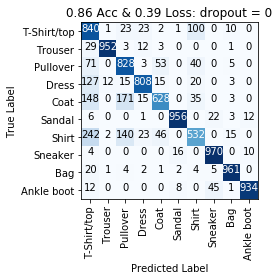

Testing dropout = 0.15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_41 (Dense)             (None, 28, 28, 28)        56        
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 28)        0         
_________________________________________________________________
dense_42 (Dense)             (None, 28, 28, 112)       3248      
_________________________________________________________________
flatten_15 (Flatten)         (None, 87808)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

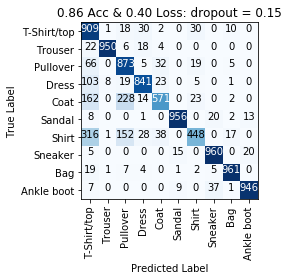

Testing dropout = 0.3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
dense_44 (Dense)             (None, 28, 28, 28)        56        
_________________________________________________________________
dropout_14 (Dropout)         (None, 28, 28, 28)        0         
_________________________________________________________________
dense_45 (Dense)             (None, 28, 28, 112)       3248      
_________________________________________________________________
flatten_16 (Flatten)         (None, 87808)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)               

KeyboardInterrupt: 

In [29]:
model_params = set_params()

permutation_setting = 'dropout'
permutation_values = [0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90]

for value in permutation_values:
    model_params[permutation_setting] = value
    print('Testing {} = {}'.format(permutation_setting, value))
    model = two_neural(model_params)
    y_pred, metrics = fit_model(model, model_params, x_train, y_train, x_test, y_test)
    title = '{:4.2f} Acc & {:4.2f} Loss {} = {}'.format(metrics['acc'], metrics['loss'], permutation_setting, value)
    conf_matrix(y_test, y_pred, classes_list, title=title)